In [1]:
# Importing tools for EDA.  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


# Importing input data
pd.set_option('display.max_columns', 30)
df = pd.read_csv('~/Documents/Git/skillfactory/Unit2/datasheet/prj2_eda_stud_math.csv')

display(df.head(3))
df.info()

# First conclusion: We are going to predict the influence of different factors (columns)
# on score (column).  
# That is why I`ll drop all NaN values at score colum first.  
df.dropna(subset = ["score"], inplace=True)

# Let`s see the columns names.  
df.columns

# Let`s rename some columns to a common pattern.  
df.columns = ['school', 'sex', 'age', 'addr', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paidlessons', 'activities', 'nursery',
       'granular', 'wishhigher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

#Let`s see the results of renaming.  
display(df.head(40))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,addr,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paidlessons,activities,nursery,granular,wishhigher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [2]:
# Let`s see how does a score data looks like.  
df.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<AxesSubplot:>

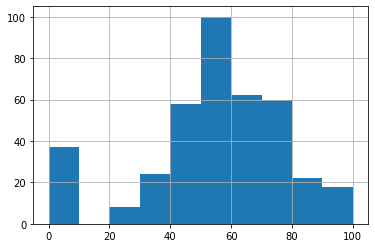

In [3]:
df.score.hist()

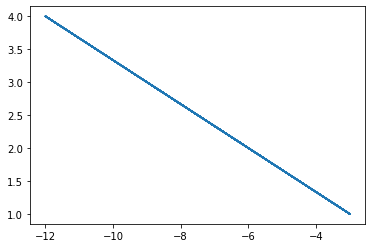

In [4]:
# Let`s see what data is in granular column - I have 
# no description for it`s data.  

plt.plot(df.granular, df.studytime)

In [5]:
# The granular and studytime are totally identical.  
# I will drop granular column from the dataset.  
df.drop(['granular'], inplace=True, axis=1)

In [6]:
# Let`s prepare all other data for processing.  
# Looking for missing, None and NaN data in columns.  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       389 non-null    object 
 1   sex          389 non-null    object 
 2   age          389 non-null    int64  
 3   addr         374 non-null    object 
 4   famsize      362 non-null    object 
 5   pstatus      344 non-null    object 
 6   medu         386 non-null    float64
 7   fedu         365 non-null    float64
 8   mjob         370 non-null    object 
 9   fjob         353 non-null    object 
 10  reason       372 non-null    object 
 11  guardian     358 non-null    object 
 12  traveltime   361 non-null    float64
 13  studytime    382 non-null    float64
 14  failures     367 non-null    float64
 15  schoolsup    380 non-null    object 
 16  famsup       351 non-null    object 
 17  paidlessons  350 non-null    object 
 18  activities   375 non-null    object 
 19  nursery 

In [7]:
def get_iqr_data(col, set_range_min=0, set_range_max=1000, set_bins=16):
    # Calculating quantiles and IQR.  
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    iqr = perc75-perc25
    
    # Preparing output.  
    print('25th percentile:{},'.format(perc25),
         '75th pecentile:{}'.format(perc75),
         'IQR:{}'.format(iqr),
         "Outlier margins: [{a},{b}]".format(a=perc25-1.5*iqr,
                                             b=perc75+1.5*iqr))
   
    # Preparing graphics.  
    df[col].loc[df[col].between(perc25-1.5*iqr,perc75+1.5*iqr)].hist(bins=set_bins, 
                                                          range=(set_range_min,set_range_max),
                                                          label='IQR')
    df[col].hist(alpha=0.3, bins=set_bins, range=(set_range_min,set_range_max), label='All Data')
    plt.legend()
    plt.grid()
    plt.show()
    
    #Outliers to remove:
    outliers_count = (df[col].value_counts()
                     -df[col].loc[df[col].between(perc25-1.5*iqr,perc75+1.5*iqr)].value_counts())
    print("---")
    print("Outliers removed:{}".format(outliers_count))
    df[col] = df[col].loc[df[col].between(perc25-1.5*iqr,perc75+1.5*iqr)]
    return

def get_boxplot(col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score', data=df, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for '+col)
    plt.show()
    return

def check_column(col):
    print("\n\n---",col,"(",df[col].dtype,")---")
    display(df[col].describe())
    
    if df[col].dtype == 'object':
        # Cleaning nan values.  
        df[col] = df[col].astype(str).apply(lambda x:None if x=='nan' else x)
        # Cleaning NaN values.  
        df[col] = df[col].astype(str).apply(lambda x:None if x.strip()=='' else x)
        # Only valid data left.  
        df[col] = df[col].loc[df[col]!='None']
        # Building hist
        print(df[col].hist())
        # Building boxplot
        print(get_boxplot(col))
        
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df.dropna(subset=[col], inplace=True)
        print(get_iqr_data(col, df[col].min(), df[col].max()))
        
    else:
        print("UNKNOWN DATATYPE FOR COL",col)
    
    print("Null values:",df[col].isnull().values.sum())
    print("Unique values:",df[col].nunique())
    print("Total values in column: ",df[col].value_counts().sum())
    print("Valid values:")
    print(df[col].value_counts())
    return




--- school ( object )---


count     389
unique      2
top        GP
freq      344
Name: school, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


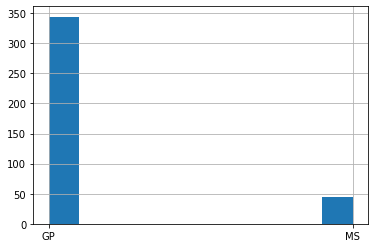

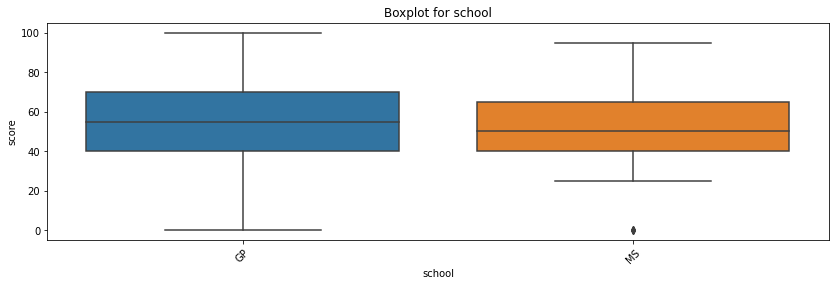

None
Null values: 0
Unique values: 2
Total values in column:  389
Valid values:
GP    344
MS     45
Name: school, dtype: int64


--- sex ( object )---


count     389
unique      2
top         F
freq      204
Name: sex, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


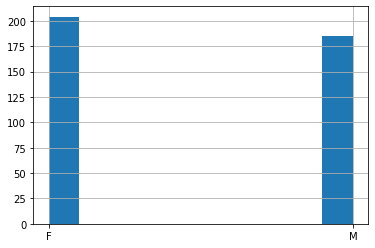

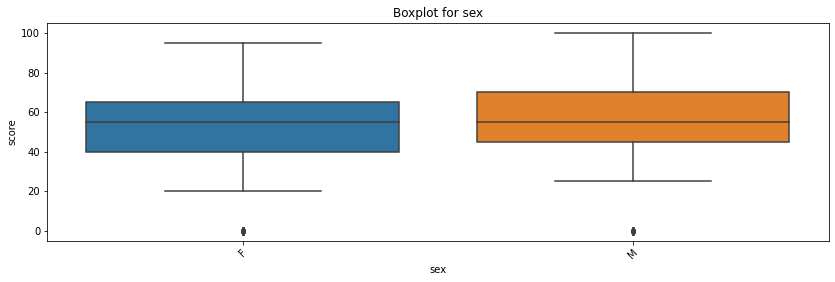

None
Null values: 0
Unique values: 2
Total values in column:  389
Valid values:
F    204
M    185
Name: sex, dtype: int64


--- age ( int64 )---


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25th percentile:16.0, 75th pecentile:18.0 IQR:2.0 Outlier margins: [13.0,21.0]


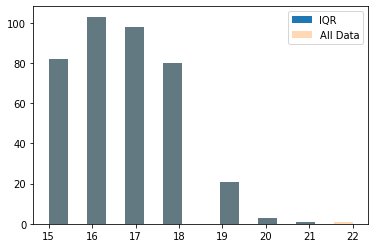

---
Outliers removed:15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    NaN
Name: age, dtype: float64
None
Null values: 1
Unique values: 7
Total values in column:  388
Valid values:
16.0    103
17.0     98
15.0     82
18.0     80
19.0     21
20.0      3
21.0      1
Name: age, dtype: int64


--- addr ( object )---


count     374
unique      2
top         U
freq      291
Name: addr, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


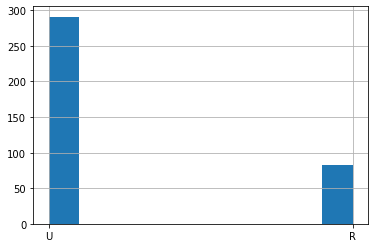

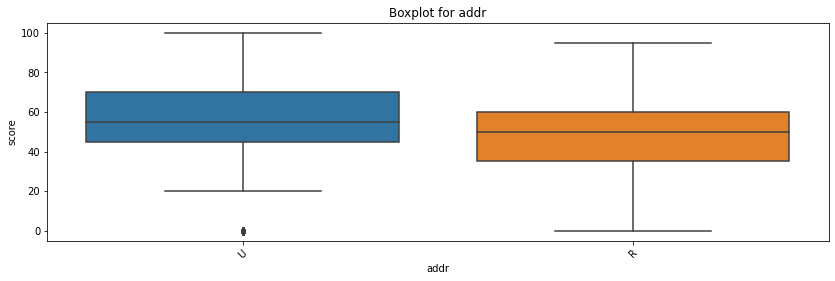

None
Null values: 15
Unique values: 2
Total values in column:  374
Valid values:
U    291
R     83
Name: addr, dtype: int64


--- famsize ( object )---


count     362
unique      2
top       GT3
freq      255
Name: famsize, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


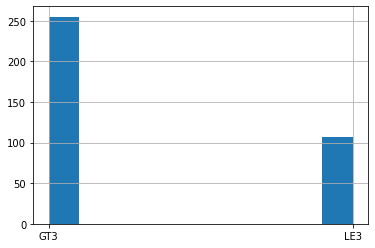

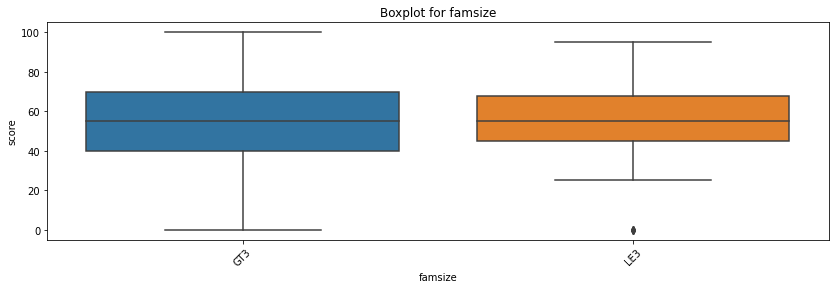

None
Null values: 27
Unique values: 2
Total values in column:  362
Valid values:
GT3    255
LE3    107
Name: famsize, dtype: int64


--- pstatus ( object )---


count     344
unique      2
top         T
freq      308
Name: pstatus, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


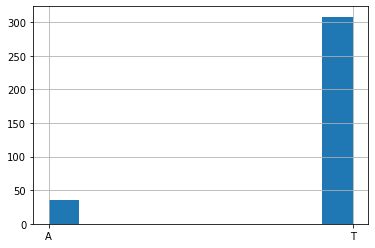

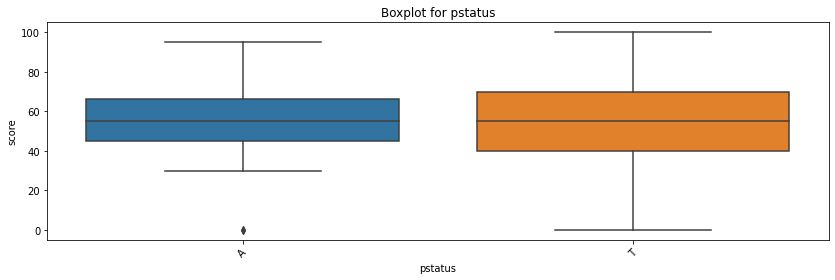

None
Null values: 45
Unique values: 2
Total values in column:  344
Valid values:
T    308
A     36
Name: pstatus, dtype: int64


--- medu ( float64 )---


count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

25th percentile:2.0, 75th pecentile:4.0 IQR:2.0 Outlier margins: [-1.0,7.0]


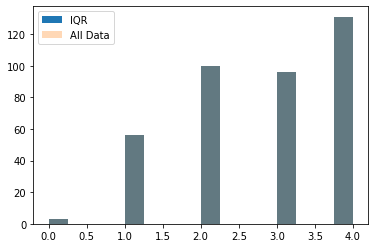

---
Outliers removed:4.0    0
2.0    0
3.0    0
1.0    0
0.0    0
Name: medu, dtype: int64
None
Null values: 0
Unique values: 5
Total values in column:  386
Valid values:
4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: medu, dtype: int64


--- fedu ( float64 )---


count    362.000000
mean       2.632597
std        2.249121
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

25th percentile:2.0, 75th pecentile:3.0 IQR:1.0 Outlier margins: [0.5,4.5]


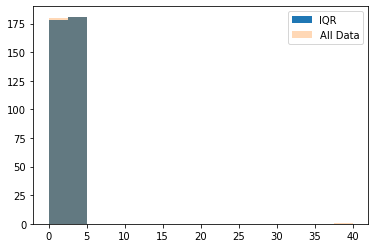

---
Outliers removed:0.0     NaN
1.0     0.0
2.0     0.0
3.0     0.0
4.0     0.0
40.0    NaN
Name: fedu, dtype: float64
None
Null values: 3
Unique values: 4
Total values in column:  359
Valid values:
2.0    104
3.0     93
4.0     88
1.0     74
Name: fedu, dtype: int64


--- mjob ( object )---


count       343
unique        5
top       other
freq        117
Name: mjob, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


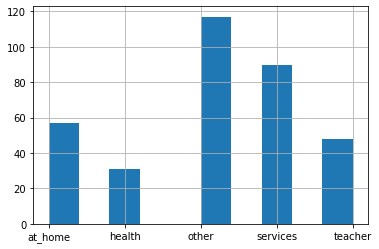

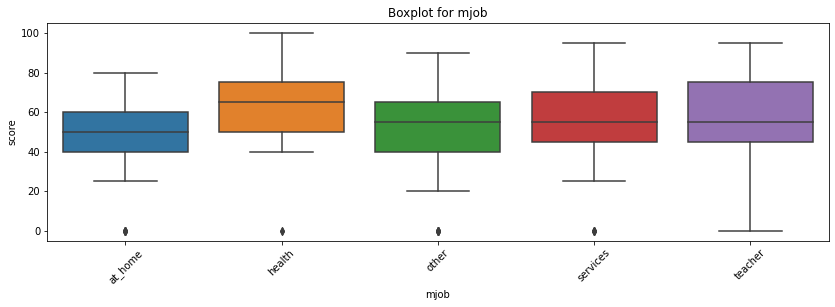

None
Null values: 19
Unique values: 5
Total values in column:  343
Valid values:
other       117
services     90
at_home      57
teacher      48
health       31
Name: mjob, dtype: int64


--- fjob ( object )---


count       328
unique        5
top       other
freq        186
Name: fjob, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


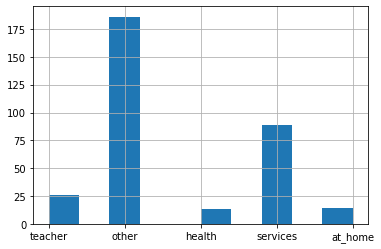

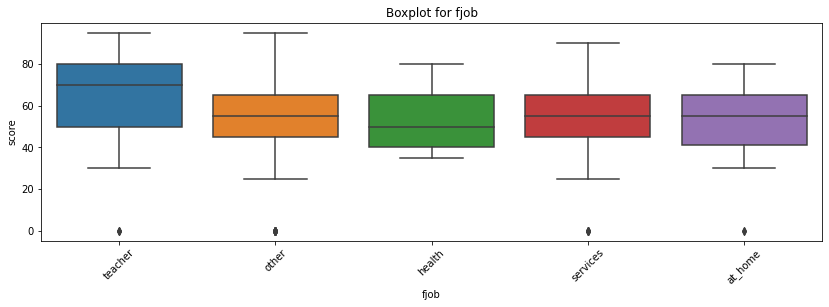

None
Null values: 34
Unique values: 5
Total values in column:  328
Valid values:
other       186
services     89
teacher      26
at_home      14
health       13
Name: fjob, dtype: int64


--- reason ( object )---


count        346
unique         4
top       course
freq         126
Name: reason, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


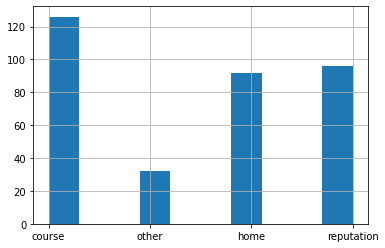

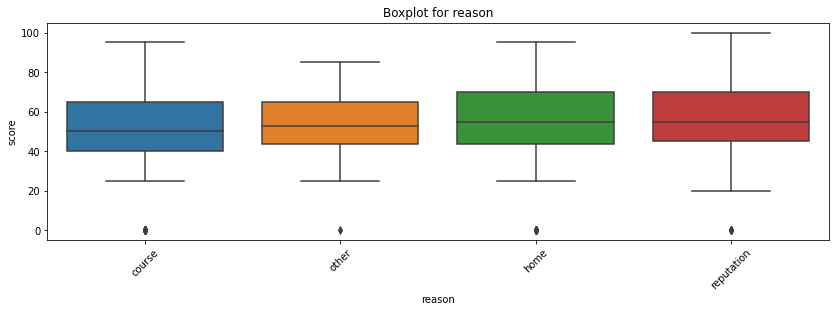

None
Null values: 16
Unique values: 4
Total values in column:  346
Valid values:
course        126
reputation     96
home           92
other          32
Name: reason, dtype: int64


--- guardian ( object )---


count        332
unique         3
top       mother
freq         233
Name: guardian, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


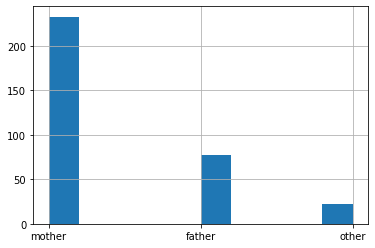

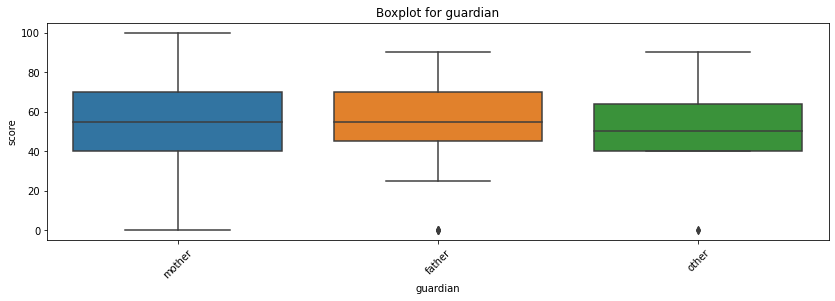

None
Null values: 30
Unique values: 3
Total values in column:  332
Valid values:
mother    233
father     77
other      22
Name: guardian, dtype: int64


--- traveltime ( float64 )---


count    337.000000
mean       1.454006
std        0.706132
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

25th percentile:1.0, 75th pecentile:2.0 IQR:1.0 Outlier margins: [-0.5,3.5]


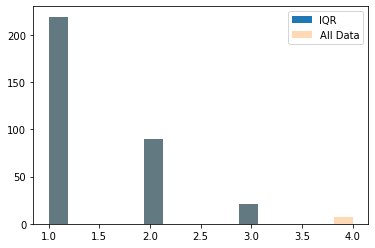

---
Outliers removed:1.0    0.0
2.0    0.0
3.0    0.0
4.0    NaN
Name: traveltime, dtype: float64
None
Null values: 7
Unique values: 3
Total values in column:  330
Valid values:
1.0    219
2.0     90
3.0     21
Name: traveltime, dtype: int64


--- studytime ( float64 )---


count    331.000000
mean       2.033233
std        0.853929
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

25th percentile:1.0, 75th pecentile:2.0 IQR:1.0 Outlier margins: [-0.5,3.5]


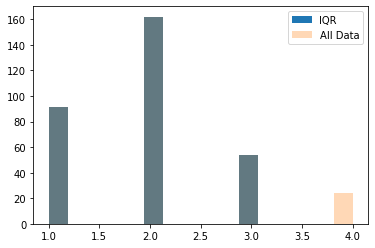

---
Outliers removed:1.0    0.0
2.0    0.0
3.0    0.0
4.0    NaN
Name: studytime, dtype: float64
None
Null values: 24
Unique values: 3
Total values in column:  307
Valid values:
2.0    162
1.0     91
3.0     54
Name: studytime, dtype: int64


--- failures ( float64 )---


count    315.000000
mean       0.320635
std        0.732798
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

25th percentile:0.0, 75th pecentile:0.0 IQR:0.0 Outlier margins: [0.0,0.0]


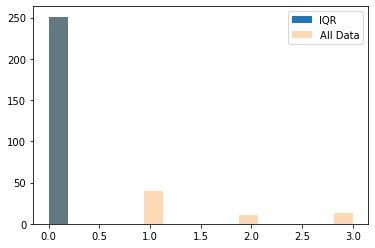

---
Outliers removed:0.0    0.0
1.0    NaN
2.0    NaN
3.0    NaN
Name: failures, dtype: float64
None
Null values: 64
Unique values: 1
Total values in column:  251
Valid values:
0.0    251
Name: failures, dtype: int64


--- schoolsup ( object )---


count     307
unique      2
top        no
freq      267
Name: schoolsup, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


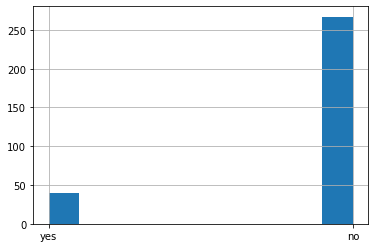

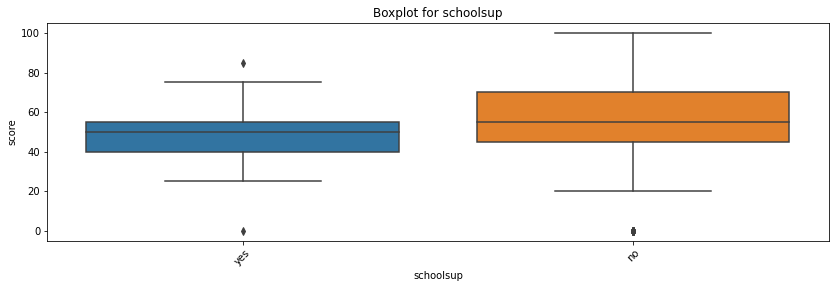

None
Null values: 8
Unique values: 2
Total values in column:  307
Valid values:
no     267
yes     40
Name: schoolsup, dtype: int64


--- famsup ( object )---


count     286
unique      2
top       yes
freq      173
Name: famsup, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


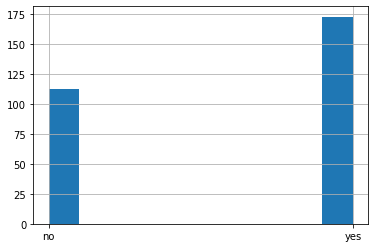

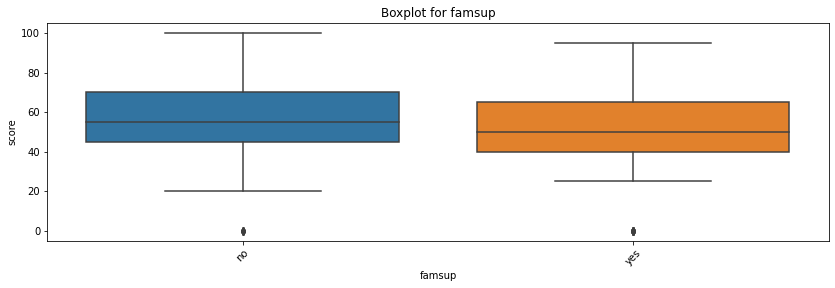

None
Null values: 29
Unique values: 2
Total values in column:  286
Valid values:
yes    173
no     113
Name: famsup, dtype: int64


--- paidlessons ( object )---


count     285
unique      2
top        no
freq      161
Name: paidlessons, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


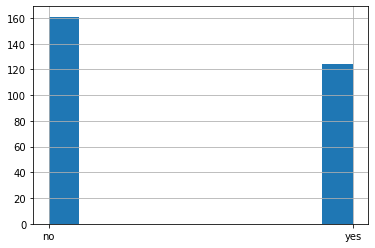

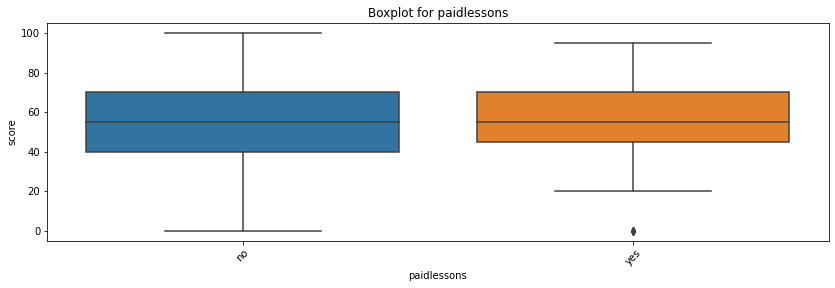

None
Null values: 30
Unique values: 2
Total values in column:  285
Valid values:
no     161
yes    124
Name: paidlessons, dtype: int64


--- activities ( object )---


count     303
unique      2
top       yes
freq      155
Name: activities, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


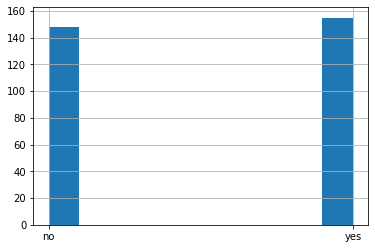

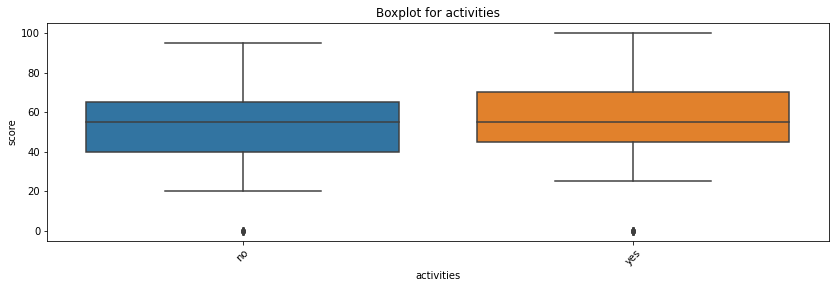

None
Null values: 12
Unique values: 2
Total values in column:  303
Valid values:
yes    155
no     148
Name: activities, dtype: int64


--- nursery ( object )---


count     300
unique      2
top       yes
freq      238
Name: nursery, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


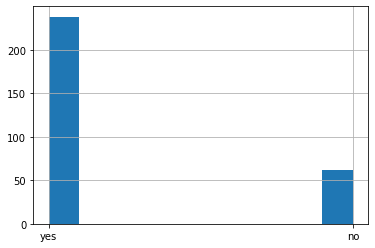

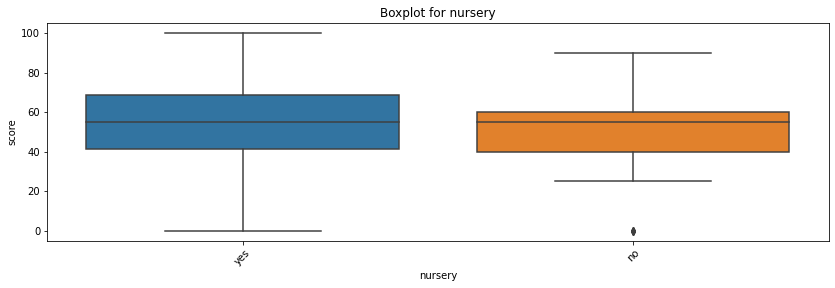

None
Null values: 15
Unique values: 2
Total values in column:  300
Valid values:
yes    238
no      62
Name: nursery, dtype: int64


--- wishhigher ( object )---


count     303
unique      2
top       yes
freq      287
Name: wishhigher, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


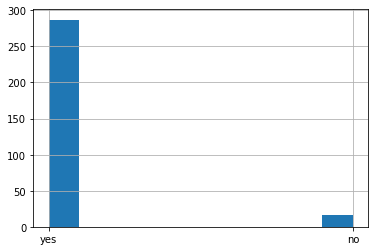

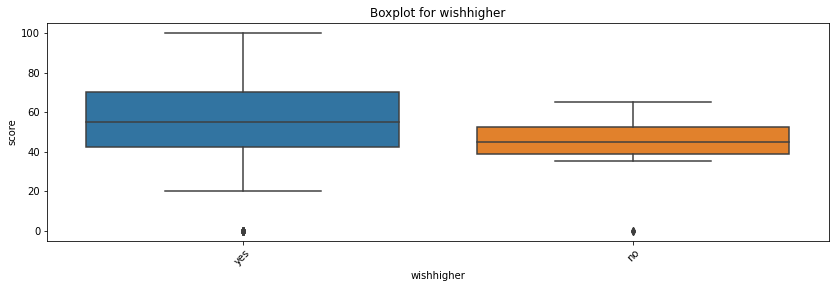

None
Null values: 12
Unique values: 2
Total values in column:  303
Valid values:
yes    287
no      16
Name: wishhigher, dtype: int64


--- internet ( object )---


count     289
unique      2
top       yes
freq      246
Name: internet, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


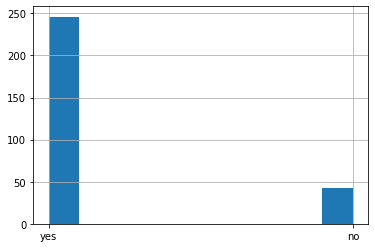

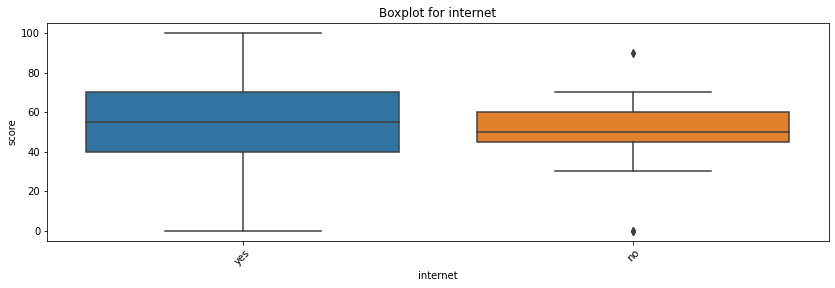

None
Null values: 26
Unique values: 2
Total values in column:  289
Valid values:
yes    246
no      43
Name: internet, dtype: int64


--- romantic ( object )---


count     296
unique      2
top        no
freq      194
Name: romantic, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


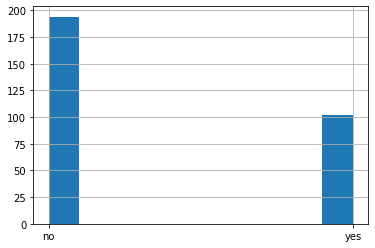

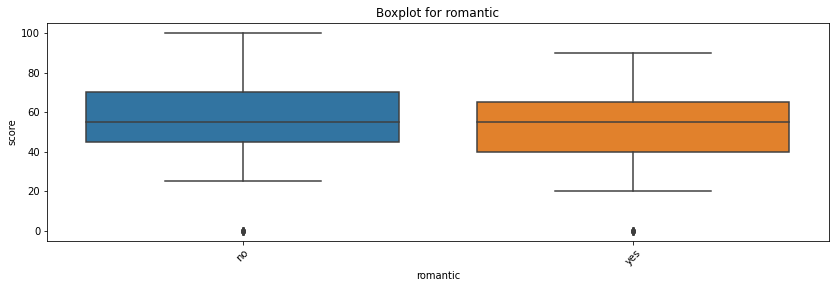

None
Null values: 19
Unique values: 2
Total values in column:  296
Valid values:
no     194
yes    102
Name: romantic, dtype: int64


--- famrel ( float64 )---


count    293.000000
mean       3.907850
std        0.926238
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

25th percentile:4.0, 75th pecentile:4.0 IQR:0.0 Outlier margins: [4.0,4.0]


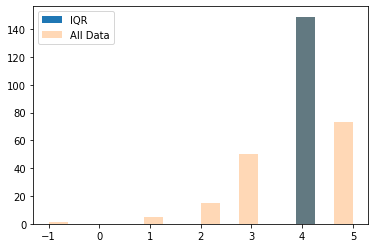

---
Outliers removed:-1.0    NaN
 1.0    NaN
 2.0    NaN
 3.0    NaN
 4.0    0.0
 5.0    NaN
Name: famrel, dtype: float64
None
Null values: 144
Unique values: 1
Total values in column:  149
Valid values:
4.0    149
Name: famrel, dtype: int64


--- freetime ( float64 )---


count    287.000000
mean       3.205575
std        0.994515
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

25th percentile:3.0, 75th pecentile:4.0 IQR:1.0 Outlier margins: [1.5,5.5]


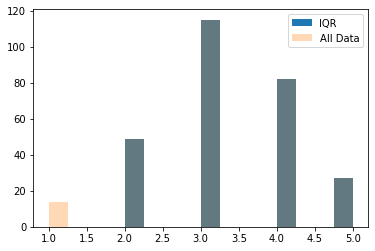

---
Outliers removed:1.0    NaN
2.0    0.0
3.0    0.0
4.0    0.0
5.0    0.0
Name: freetime, dtype: float64
None
Null values: 14
Unique values: 4
Total values in column:  273
Valid values:
3.0    115
4.0     82
2.0     49
5.0     27
Name: freetime, dtype: int64


--- goout ( float64 )---


count    282.000000
mean       3.109929
std        1.086298
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

25th percentile:2.0, 75th pecentile:4.0 IQR:2.0 Outlier margins: [-1.0,7.0]


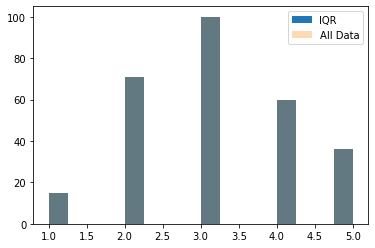

---
Outliers removed:3.0    0
2.0    0
4.0    0
5.0    0
1.0    0
Name: goout, dtype: int64
None
Null values: 0
Unique values: 5
Total values in column:  282
Valid values:
3.0    100
2.0     71
4.0     60
5.0     36
1.0     15
Name: goout, dtype: int64


--- health ( float64 )---


count    272.000000
mean       3.430147
std        1.380776
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

25th percentile:2.0, 75th pecentile:5.0 IQR:3.0 Outlier margins: [-2.5,9.5]


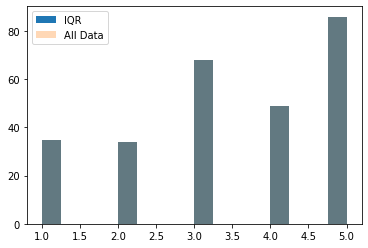

---
Outliers removed:5.0    0
3.0    0
4.0    0
1.0    0
2.0    0
Name: health, dtype: int64
None
Null values: 0
Unique values: 5
Total values in column:  272
Valid values:
5.0    86
3.0    68
4.0    49
1.0    35
2.0    34
Name: health, dtype: int64


--- absences ( float64 )---


count    263.000000
mean       7.741445
std       27.539452
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

25th percentile:0.0, 75th pecentile:8.0 IQR:8.0 Outlier margins: [-12.0,20.0]


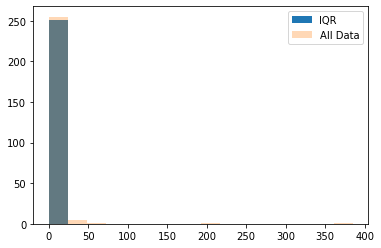

---
Outliers removed:0.0      0.0
1.0      0.0
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
6.0      0.0
7.0      0.0
8.0      0.0
9.0      0.0
10.0     0.0
12.0     0.0
13.0     0.0
14.0     0.0
15.0     0.0
16.0     0.0
17.0     0.0
18.0     0.0
20.0     0.0
21.0     NaN
22.0     NaN
24.0     NaN
25.0     NaN
26.0     NaN
28.0     NaN
38.0     NaN
40.0     NaN
56.0     NaN
212.0    NaN
385.0    NaN
Name: absences, dtype: float64
None
Null values: 12
Unique values: 19
Total values in column:  251
Valid values:
0.0     77
4.0     41
2.0     38
6.0     19
8.0     16
10.0    12
14.0     8
12.0     8
16.0     7
3.0      6
5.0      4
7.0      3
9.0      2
20.0     2
18.0     2
15.0     2
1.0      2
17.0     1
13.0     1
Name: absences, dtype: int64


--- score ( float64 )---


count    263.000000
mean      52.110266
std       21.956220
min        0.000000
25%       42.500000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

25th percentile:42.5, 75th pecentile:65.0 IQR:22.5 Outlier margins: [8.75,98.75]


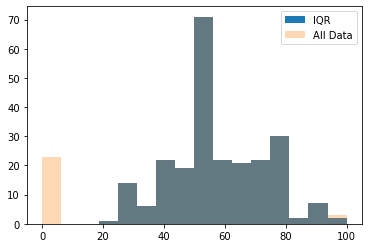

---
Outliers removed:0.0      NaN
20.0     0.0
25.0     0.0
30.0     0.0
35.0     0.0
40.0     0.0
45.0     0.0
50.0     0.0
55.0     0.0
60.0     0.0
65.0     0.0
70.0     0.0
75.0     0.0
80.0     0.0
85.0     0.0
90.0     0.0
95.0     0.0
100.0    NaN
Name: score, dtype: float64
None
Null values: 24
Unique values: 16
Total values in column:  239
Valid values:
50.0    37
55.0    34
40.0    22
70.0    22
60.0    22
65.0    21
45.0    19
75.0    19
80.0    11
30.0    10
90.0     7
35.0     6
25.0     4
95.0     2
85.0     2
20.0     1
Name: score, dtype: int64


In [8]:
for col in df.columns:
    check_column(col)

In [9]:
# OK: school, sex
# 

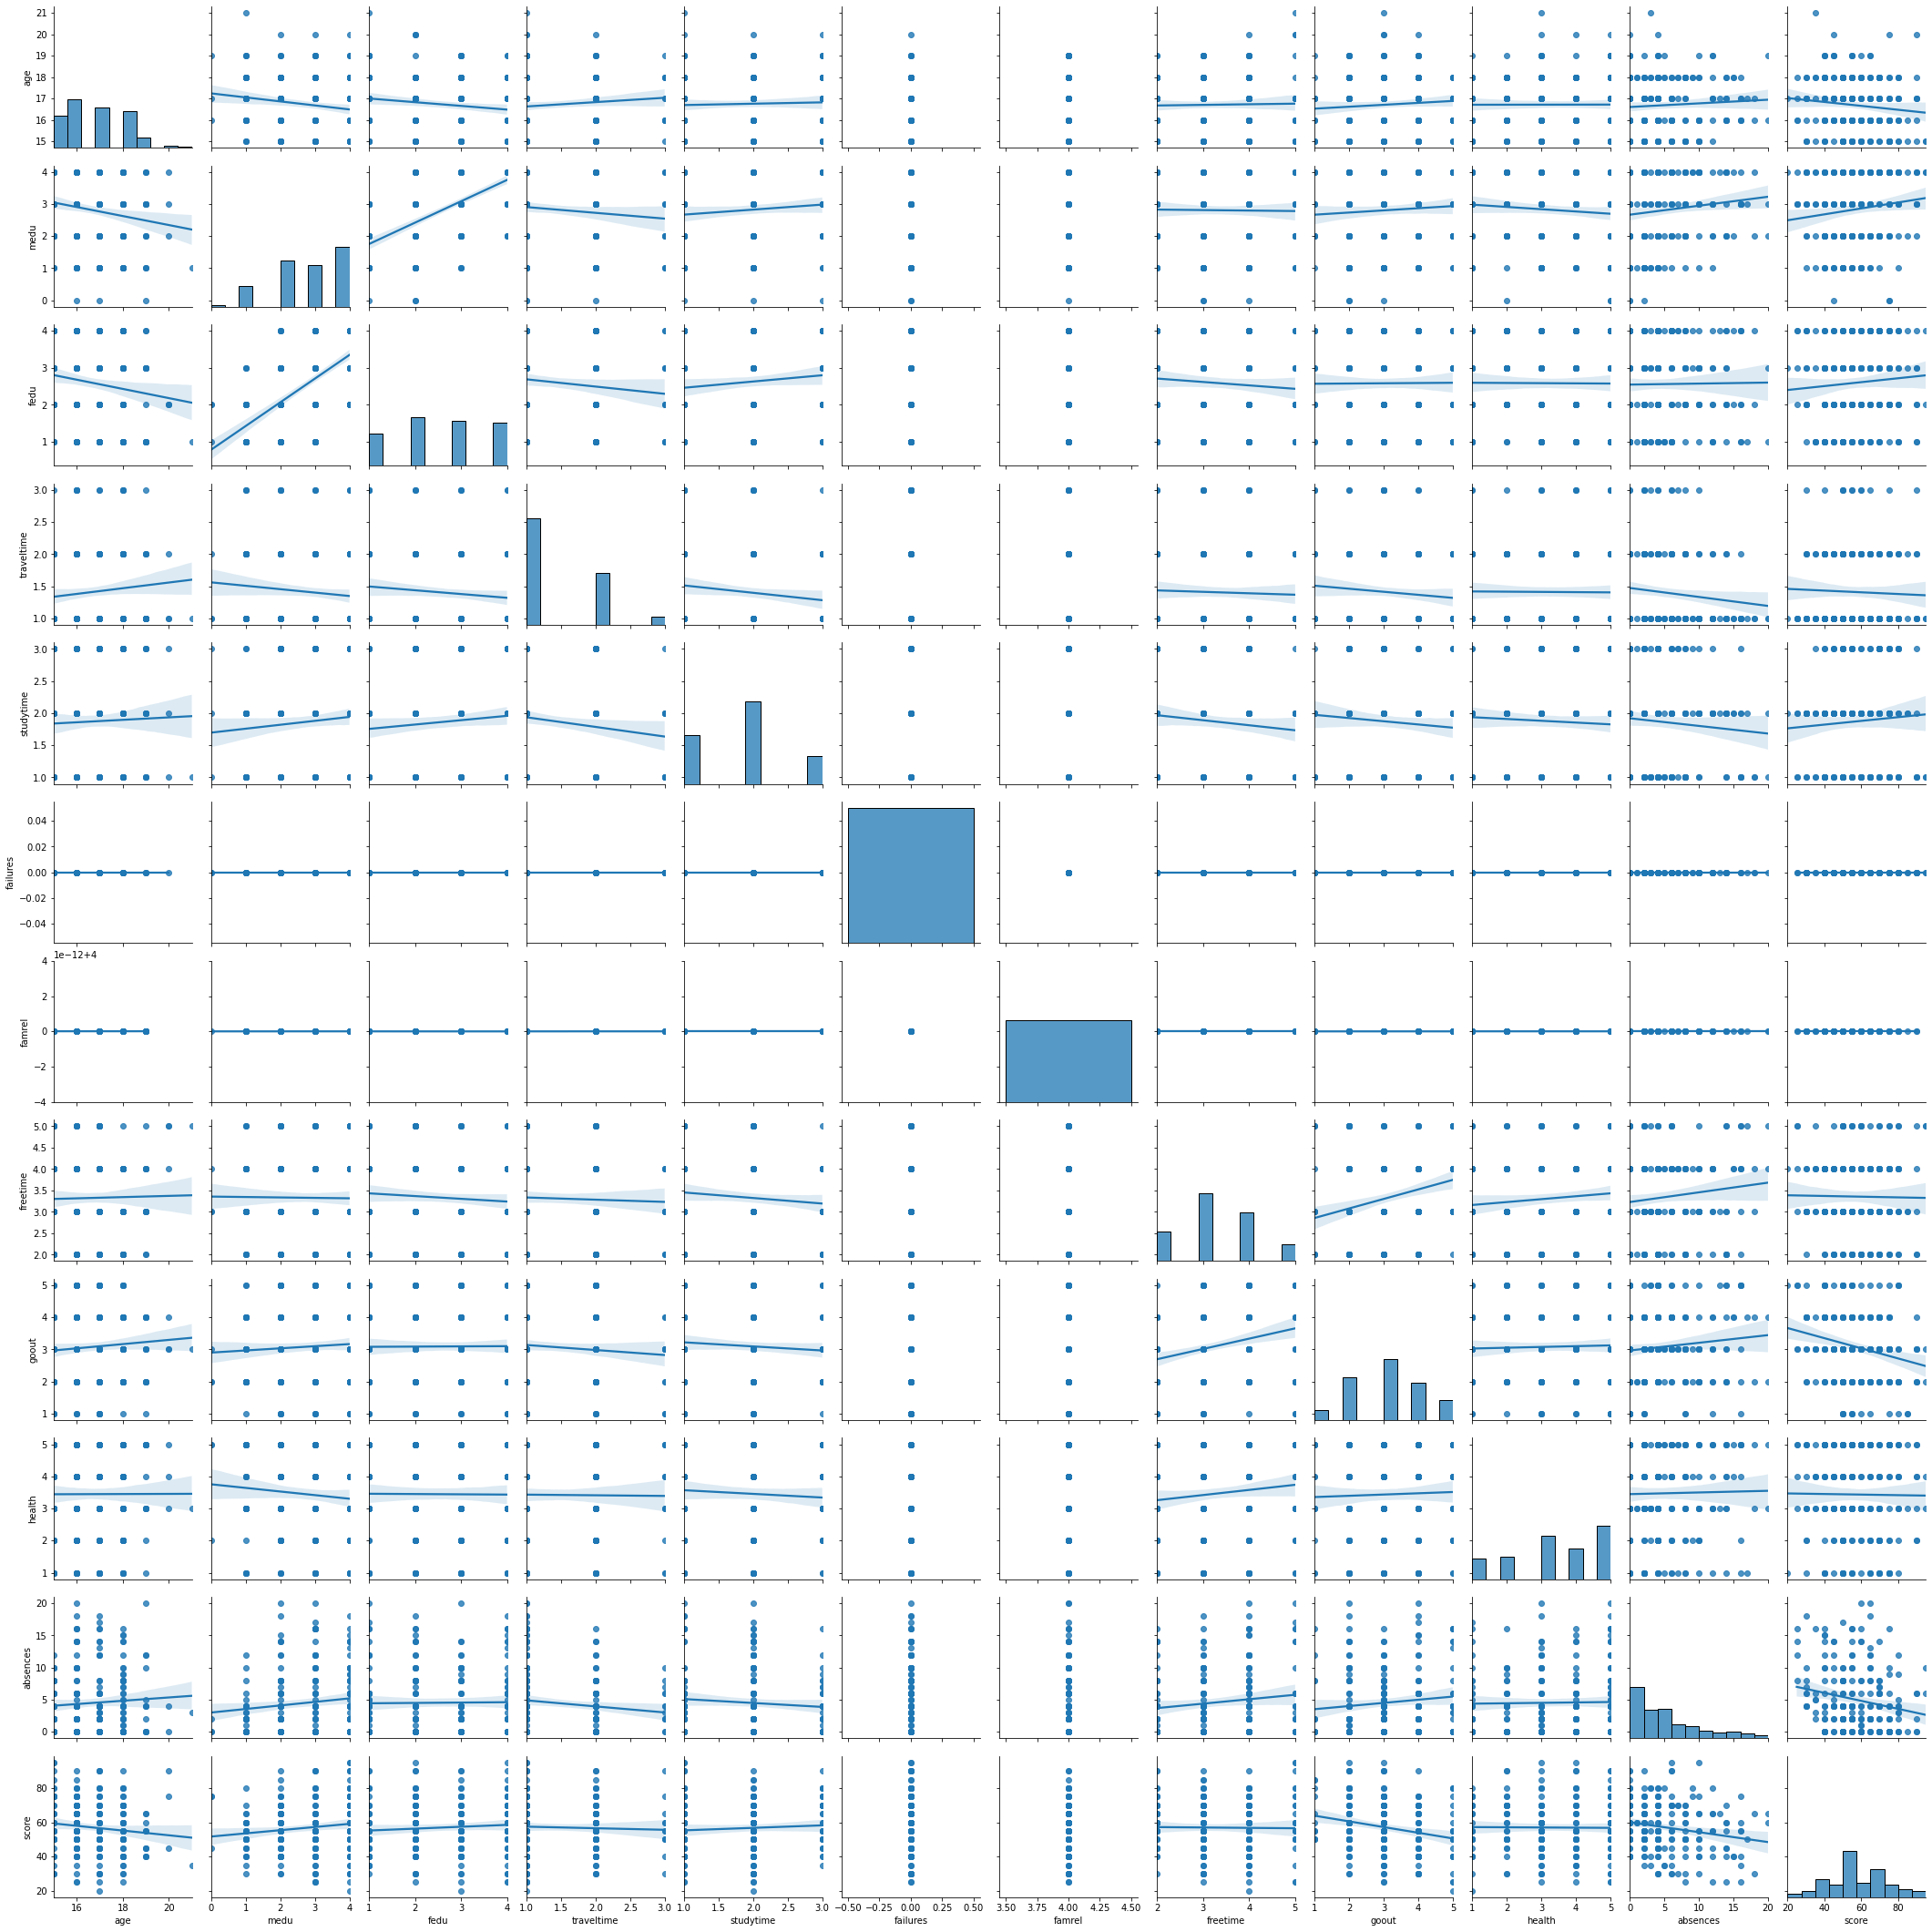

In [10]:
sns.pairplot(df, kind='reg')


In [11]:
df.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161967,-0.146795,0.094832,0.034721,NaN,NaN,0.020256,0.076895,0.002101,0.066102,-0.112289
medu,-0.161967,1.000000,0.653055,-0.097666,0.097492,NaN,NaN,-0.012354,0.066636,-0.089095,0.123861,0.130704
fedu,-0.146795,0.653055,1.000000,-0.107377,0.107084,NaN,NaN,-0.077049,0.006752,-0.006755,0.012335,0.076362
traveltime,0.094832,-0.097666,-0.107377,1.000000,-0.131064,NaN,NaN,-0.034096,-0.085967,-0.008609,-0.114614,-0.034903
studytime,0.034721,0.097492,0.107084,-0.131064,1.000000,NaN,NaN,-0.100487,-0.079661,-0.056297,-0.085339,0.064964
failures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famrel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freetime,0.020256,-0.012354,-0.077049,-0.034096,-0.100487,NaN,NaN,1.000000,0.266852,0.104133,0.125000,-0.013704
goout,0.076895,0.066636,0.006752,-0.085967,-0.079661,NaN,NaN,0.266852,1.000000,0.030871,0.108211,-0.228742
health,0.002101,-0.089095,-0.006755,-0.008609,-0.056297,NaN,NaN,0.104133,0.030871,1.000000,0.018331,-0.009984
